# Gallery

This chapter contains visualizations generated using the GCol library in conjunction with NetworkX. Each example is accompanied by the code used to generate it. As before, we start by importing the necessary libraries.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import gcol

## Complete Graphs

A [complete graph](https://en.wikipedia.org/wiki/Complete_graph) with $n$ nodes has a chromatic number of $n$. The following example demonstrates this simple result using complete graphs of up to seven nodes. The option ``nx.kamada_kawai_layout()`` is then used to position the nodes in a pleasing manner.

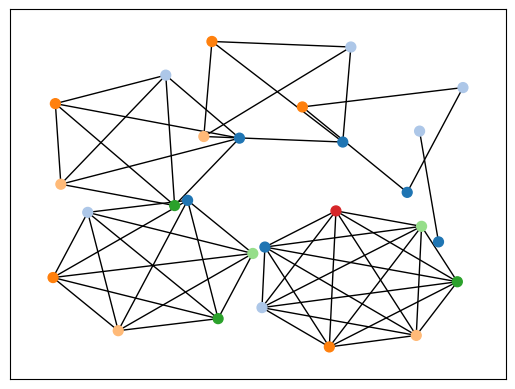

In [2]:
def make_complete(n, s):
    H  = nx.Graph()
    for i in range(n-1):
        for j in range(i+1, n):
            H.add_edge(s+i, s+j)
    return H

G = nx.Graph()
for n in range(2, 8):
    s = n*(n-1)//2
    H = make_complete(n, s)
    G = nx.union(G, H)
c = gcol.node_coloring(G)
nx.draw_networkx(G, 
                 pos=nx.kamada_kawai_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 with_labels=False, 
                 node_size=50)
plt.show()

## Cycle Graphs

The following example considers [cycle graphs](https://en.wikipedia.org/wiki/Cycle_graph) with $n\geq 3$ nodes. Cycles where $n$ is even are [bipartite](https://en.wikipedia.org/wiki/Bipartite_graph) and therefore have a chromatic number of two; otherwise, the chromatic number is three. The following demonstrates this in a similar manner to the previous example. 

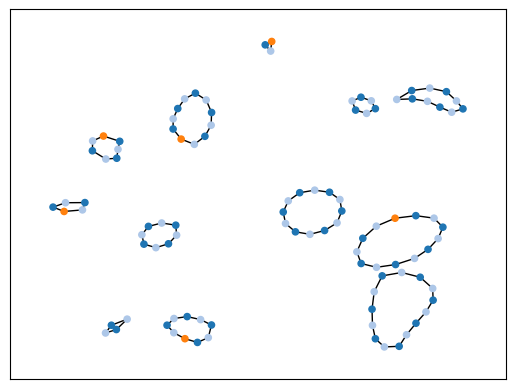

In [3]:
def make_cycle(n, s):
    H  = nx.Graph()
    for i in range(n-1):
        H.add_edge(s+i, s+i+1)
    H.add_edge(s+n-1,s)        
    return H

G = nx.Graph()
for n in range(3, 15):
    s = n*(n-1)//2
    H = make_cycle(n, s)
    G = nx.union(G, H)
c = gcol.node_coloring(G)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=3), 
                 node_color=gcol.get_node_colors(G, c),
                 with_labels=False, 
                 node_size=20)
plt.show()

## Wheel Graphs

The next example considers [wheel graphs](https://en.wikipedia.org/wiki/Wheel_graph) with $n\geq 4$ nodes. Cases with odd numbers of nodes have a chromatic number of three; otherwise, the chromatic number is four. The following demonstrates this. 

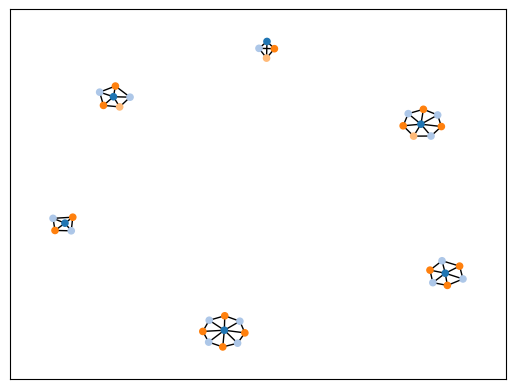

In [4]:
def make_wheel(n, s):
    H  = make_cycle(n-1, s)
    for i in range(n-1):
        H.add_edge(s+n-1, s+i)
    return H

G = nx.Graph()
for n in range(4, 10):
    s = n*(n-1)//2
    H = make_wheel(n, s)
    G = nx.union(G, H)
c = gcol.node_coloring(G)
nx.draw_networkx(G, 
                 pos=nx.spring_layout(G, seed=3),
                 node_color=gcol.get_node_colors(G, c), 
                 with_labels=False, 
                 node_size=20)
plt.show()

## Trees

Trees are connected graphs that contain no cycles. Consequently, they are bipartite and have a chromatic number of two. The following code generates a tree using the NetworkX method ``nx.barabasi_albert_graph()``. A node two-coloring of this tree is then generated.

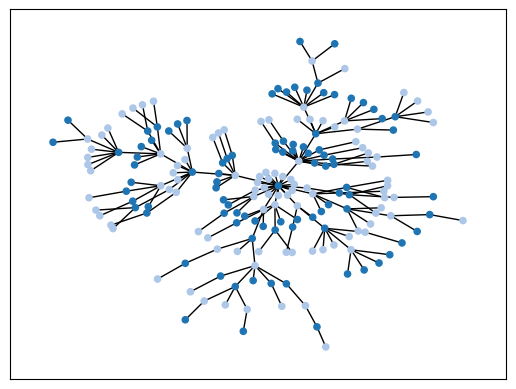

In [5]:
G = nx.barabasi_albert_graph(200, 1)
c = gcol.node_coloring(G)
nx.draw_networkx(G, 
                 pos=nx.kamada_kawai_layout(G), 
                 node_color=gcol.get_node_colors(G, c), 
                 with_labels=False, 
                 node_size=20)
plt.show()

## Planar Graphs

The following code shows visualizations of a selection of planar graphs from the [House of Graphs](https://houseofgraphs.org/) website. The names of the files used below refer to the graphs' ID number on the website. The files can also be found [here](https://github.com/Rhyd-Lewis/GCol/blob/main/docs/gallery). For each graph, we show a node coloring and face coloring.

The first two graphs considered below are [Eulerian](https://en.wikipedia.org/wiki/Eulerian_path). Consequently, their face chromatic numbers are two, as illustrated.

Colors = 3


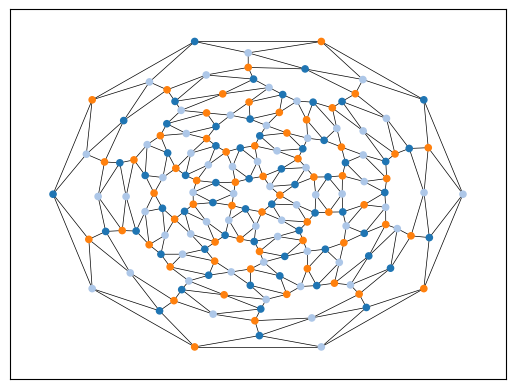

Colors = 2


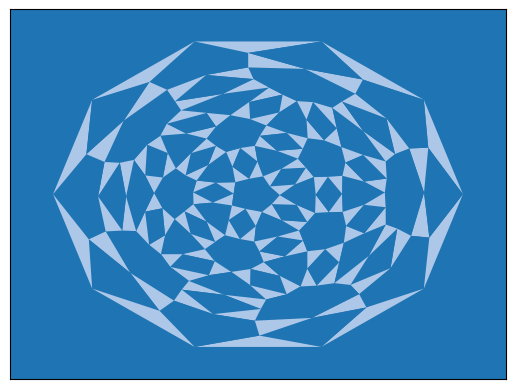

Colors = 4


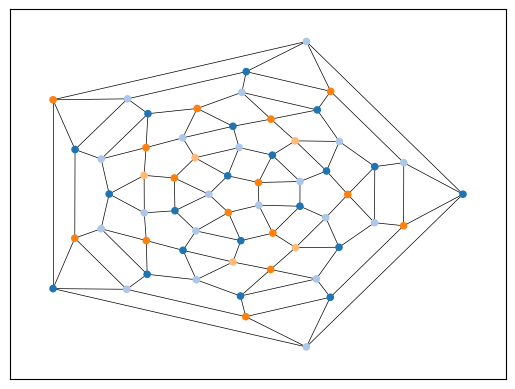

Colors = 2


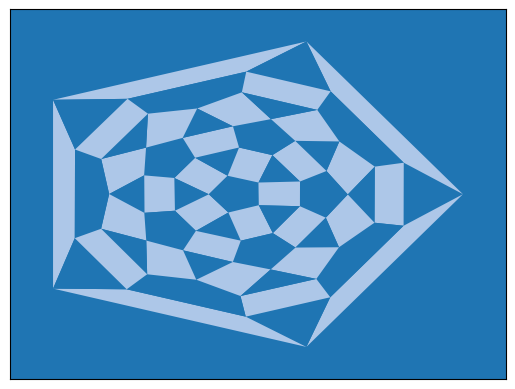

Colors = 3


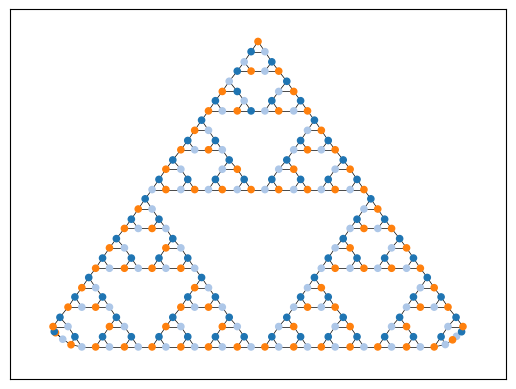

Colors = 4


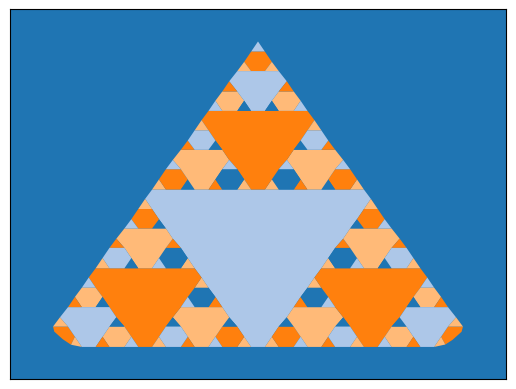

Colors = 4


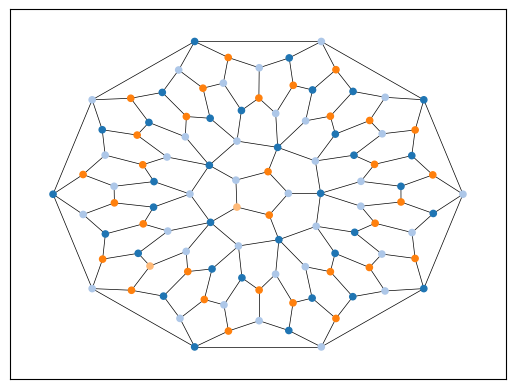

Colors = 4


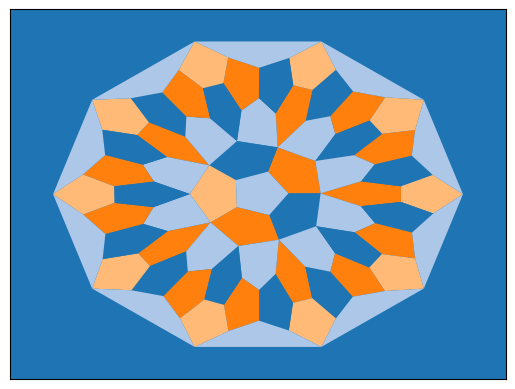

Colors = 2


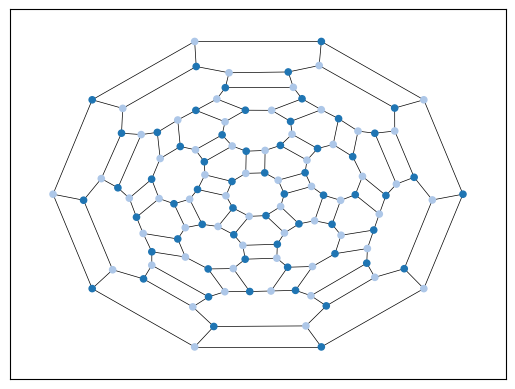

Colors = 3


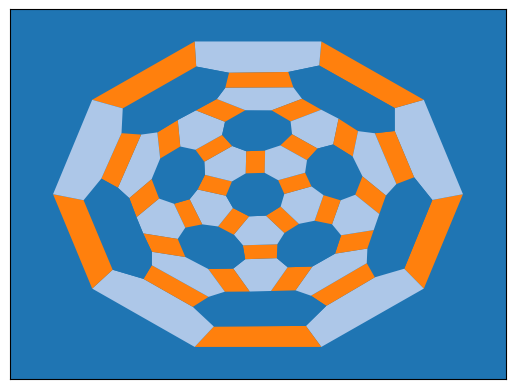

In [6]:
def graphFromFile(filename):
    G = nx.Graph()
    with open(filename, 'r') as f:
        f.readline()
        n = int(f.readline())
        for i in range(n):
            L = f.readline().split(" ")
            G.add_node(i, pos=(float(L[0]),float(L[1])))
            for j in range(2, len(L)):
                G.add_edge(i, int(L[j]))
    return G

files = ['HoG-51392.txt', 
         'HoG-1317.txt', 
         'HoG-35481.txt', 
         'HoG-1347.txt',
         'HoG-1122.txt']
        
for file in files:
    G = graphFromFile(file)
    pos = nx.get_node_attributes(G, "pos")

    c = gcol.node_coloring(G)
    print("Colors =", max(c.values()) + 1)
    nx.draw_networkx(G, 
                     pos=pos, 
                     node_color=gcol.get_node_colors(G, c), 
                     with_labels=False, 
                     width=0.5,
                     node_size=20)
    plt.show()
   
    c = gcol.face_coloring(G, pos)
    print("Colors =", max(c.values()) + 1)
    gcol.draw_face_coloring(c, pos, external=True)
    nx.draw_networkx(G,
                     pos=pos,
                     node_color='k',
                     node_size=0,
                     width=0,
                     with_labels=False)
    plt.show()

The following code contains a function for randomly generating a planar graph. Specifically, it randomly places $n$ 
nodes into the unit square and then forms a [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation) among these. In the images below, planar graphs with $n\in\{100,250,500,1000\}$ nodes are generated in turn and their faces are then colored.

Number of nodes  = 100
Number of edges  = 293
Number of faces  = 195
Number of colors = 3


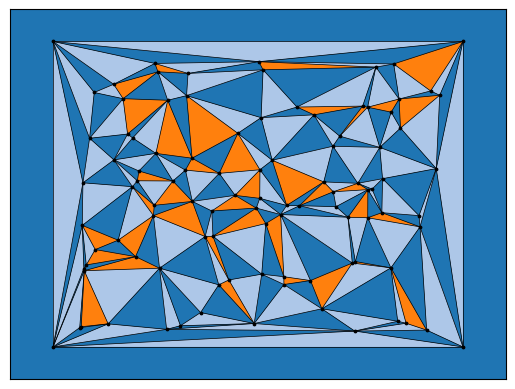

Number of nodes  = 250
Number of edges  = 743
Number of faces  = 495
Number of colors = 3


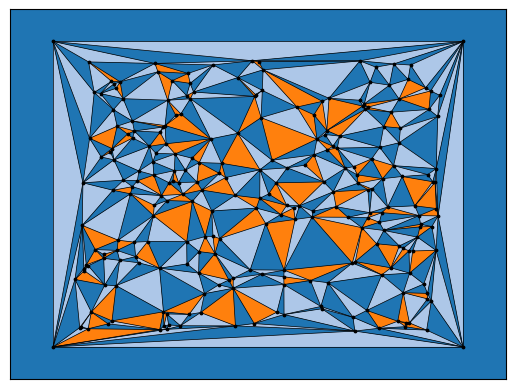

Number of nodes  = 500
Number of edges  = 1493
Number of faces  = 995
Number of colors = 3


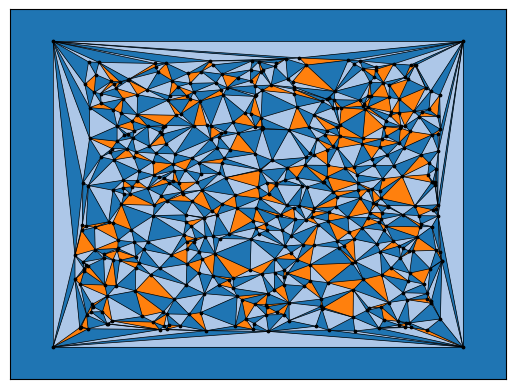

Number of nodes  = 1000
Number of edges  = 2993
Number of faces  = 1995
Number of colors = 3


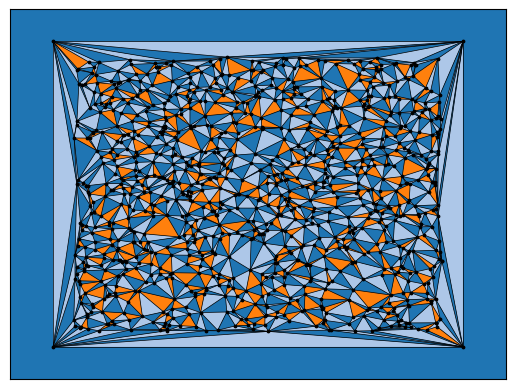

In [7]:
def make_planar_graph(n, seed=None):
    # Function for making a dense planar graph by placing nodes randomly
    # into the unit square, including corners
    assert n >= 4, "n parameter must be at least 4"
    import random
    from scipy.spatial import Delaunay
    random.seed(seed)
    P = [(0,0), (1,0), (0,1), (1, 1)]
    for i in range(4, n):
        P.append((random.uniform(0.05,0.95), random.uniform(0.05,0.95)))
    T = Delaunay(P).simplices.copy()
    G = nx.Graph()
    for v in range(n):
        G.add_node(v, pos=(P[v][0], P[v][1]))
    for x, y, z in T:
        G.add_edges_from([(x, y), (x, z), (y, z)])
    return G

for n in [100, 250, 500, 1000]:
    G = make_planar_graph(n, seed=1)
    pos = nx.get_node_attributes(G, "pos")
    c = gcol.face_coloring(G, pos)
    gcol.draw_face_coloring(c, pos, external=True)
    print("Number of nodes  =", n)
    print("Number of edges  =", G.number_of_edges())
    print("Number of faces  =", 2- n + G.number_of_edges())
    print("Number of colors =", max(c.values()) + 1)
    nx.draw_networkx(G, 
                     pos=pos, 
                     with_labels=False, 
                     node_size=3, 
                     node_color="black",
                     width=0.5)
    plt.show()

## Triangulations of Images

The next two examples consider Delaunay triangulations generated from images. These triangulations were generated using the tool at [this website](https://snorpey.github.io/triangulation/) and correspond to planar embeddings. The first image, [Lincoln.txt](https://github.com/Rhyd-Lewis/GCol/blob/main/docs/gallery/Lincoln.txt) is a portrait of [Abraham Lincoln](https://en.wikipedia.org/wiki/Abraham_Lincoln); the second, [flag.txt](https://github.com/Rhyd-Lewis/GCol/blob/main/docs/gallery/flag.txt), is a picture of the [flag of Wales](https://en.wikipedia.org/wiki/Flag_of_Wales).

Colors = 4


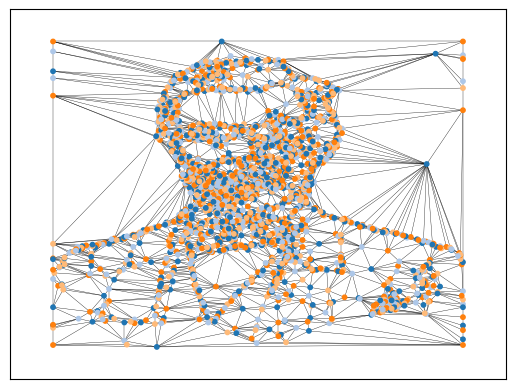

Colors = 3


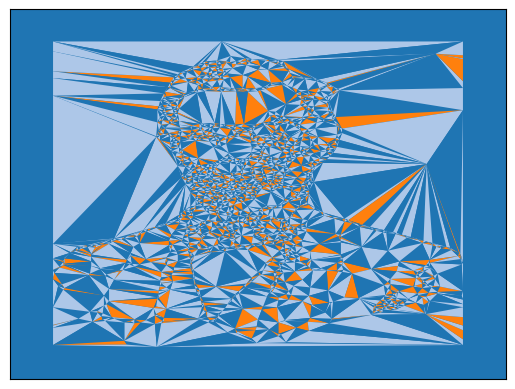

Colors = 4


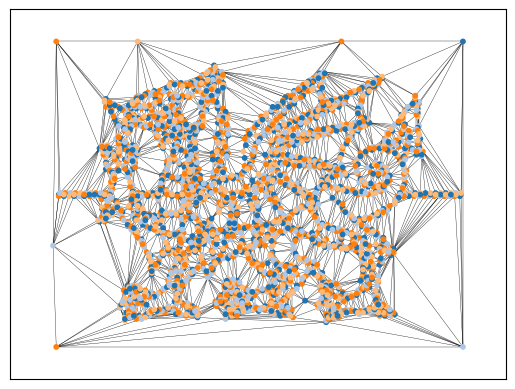

Colors = 3


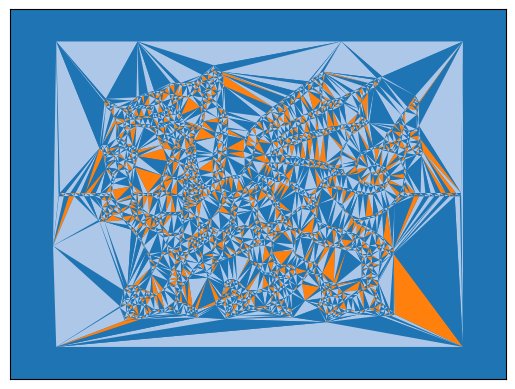

In [8]:
files = ['Lincoln.txt', 'flag.txt']
        
for file in files:
    G = graphFromFile(file)
    pos = nx.get_node_attributes(G, "pos")
    c = gcol.node_coloring(G, opt_alg=3, it_limit=100000)
    print("Colors =", max(c.values()) + 1)
    nx.draw_networkx(G, 
                     pos=pos, 
                     node_color=gcol.get_node_colors(G, c), 
                     with_labels=False, 
                     width=0.25,
                     node_size=10)
    plt.show()
    
    c = gcol.face_coloring(G, pos, opt_alg=3, it_limit=100000)
    print("Colors =", max(c.values()) + 1)
    gcol.draw_face_coloring(c, pos, external=True)
    nx.draw_networkx(G,
                     pos=pos,
                     node_color='k',
                     node_size=0,
                     width=0,
                     with_labels=False)
    plt.show()

## Coloring Street Maps

The following images show a node coloring and edge coloring of the street map of [Cardiff, Wales](https://en.wikipedia.org/wiki/Cardiff). In these graphs, edges correspond to street segments, and nodes correspond to intersections and dead ends. The file used for these images, [cardiffstreets.txt](https://github.com/Rhyd-Lewis/GCol/blob/main/docs/gallery/cardiffstreets.txt), was generated using the [osmnx](https://osmnx.readthedocs.io/en/stable/) library.

Colors = 3


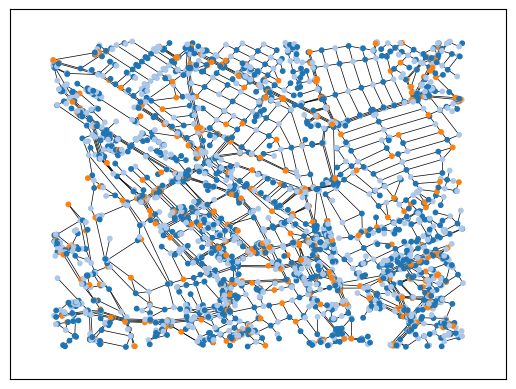

Colors = 6


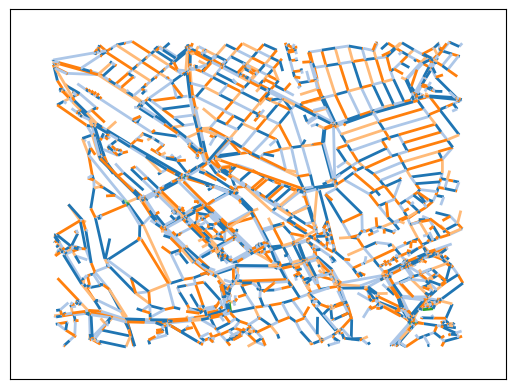

In [9]:
G = graphFromFile('cardiffstreets.txt')
pos = nx.get_node_attributes(G, "pos")
c = gcol.node_coloring(G)
print("Colors =", max(c.values()) + 1)
nx.draw_networkx(G, 
                 pos=pos, 
                 node_color=gcol.get_node_colors(G, c), 
                 with_labels=False, 
                 width=0.5,
                 node_size=10)
plt.show()

c = gcol.edge_coloring(G)
print("Colors =", max(c.values()) + 1)
nx.draw_networkx(G,
                 pos=pos,
                 edge_color=gcol.get_edge_colors(G, c),
                 node_size=0,
                 width=2,
                 with_labels=False)
plt.show()